In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msno
import joblib
import tarfile
import os
import urllib

### Scikit-learn

from sklearn import datasets
from sklearn import utils
# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

## Other for Visualization of tree
from IPython.display import Image
from six import StringIO
import pydotplus

## Decision Trees for  Classification

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names+['target'])

# shuffle the data
df_iris = utils.shuffle(df_iris)

X = df_iris[['petal length (cm)', 'petal width (cm)']].astype(np.float64)
y = df_iris['target'].astype(np.float64)

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

#### Tree Visulaization

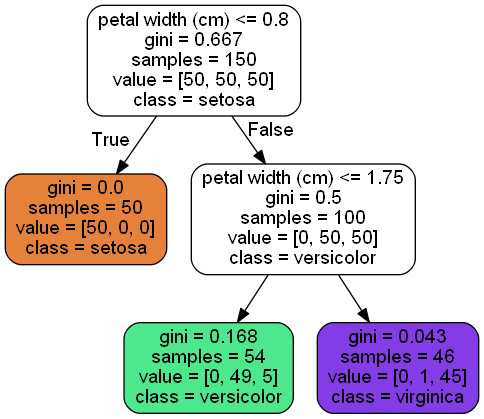

In [4]:
col_names = list(X.columns)

dot_file = StringIO()

export_graphviz(decision_tree=tree_clf,
               out_file=dot_file, rounded=True, filled=True, 
                class_names=iris.target_names, feature_names=col_names)

graph = pydotplus.graph_from_dot_data(dot_file.getvalue())

graph.write_png('tree.png')
Image(graph.create_png())

In [5]:
tree_clf_1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', splitter='best')

In [6]:
best_params_clf = {'max_depth': np.arange(2,15,2), 
              'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random']}

In [7]:
grid_search_clf = GridSearchCV(tree_clf_1, 
                               param_grid=best_params_clf, 
                               cv=5, scoring='accuracy', n_jobs=-1)

grid_search_clf.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [8]:
best_tree_clf = grid_search_clf.best_estimator_

In [9]:
score_tree_clf = cross_val_score(best_tree_clf, X, y, 
                                 cv=5, 
                                 scoring='accuracy', 
                                 n_jobs=-1)

print('score_tree_clf =>', score_tree_clf)

score_tree_clf => [1.         0.96666667 0.93333333 1.         0.93333333]


In [10]:
y_scores_clf = cross_val_predict(best_tree_clf, X, y, 
                                 cv=5, 
                                 method='predict', 
                                 n_jobs=-1)

<AxesSubplot:>

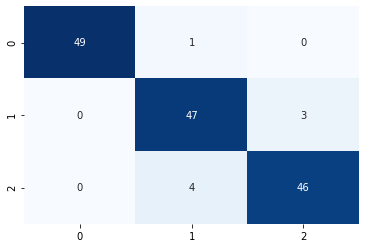

In [11]:
sns.heatmap(confusion_matrix(y, y_scores_clf), cmap='Blues', fmt='g', annot=True, cbar=False)

#### Features_Importance

In [12]:
col_names = list(X.columns)

importances = best_tree_clf.feature_importances_

df_importances = pd.DataFrame({'names':col_names, 'importances':importances})
df_importances = df_importances.sort_values('importances', ascending=False).reset_index()

df_importances

,index,names,importances
0,1,petal width (cm),0.806991
1,0,petal length (cm),0.193009


## Decision Trees for  Regression

In [13]:
X = 6 * np.random.rand(100, 1) - 3
y = np.squeeze(0.5 * X**2 + X + 2 + np.random.rand(100, 1))

In [14]:
tree_reg = DecisionTreeRegressor(max_depth=3, criterion='mse', random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [15]:
best_params_reg = {'max_depth': np.arange(2,15,2), 
                   'splitter':['best', 'random']}

grid_search_reg = GridSearchCV(tree_reg, param_grid=best_params_reg, 
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_log_error')

grid_search_reg.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_log_error')

In [16]:
best_tree_reg = grid_search_reg.best_estimator_

In [17]:
score_reg = cross_val_score(best_tree_reg, X, y, 
                cv=5, n_jobs=-1, scoring='neg_mean_squared_log_error')

score_reg_rmseLog = np.sqrt(-score_reg)
print('score_reg_rmseLog =>', score_reg_rmseLog)

score_reg_rmseLog => [0.06113012 0.07941556 0.07784188 0.09199918 0.11205537]


#### Visualize of old (tree_reg)

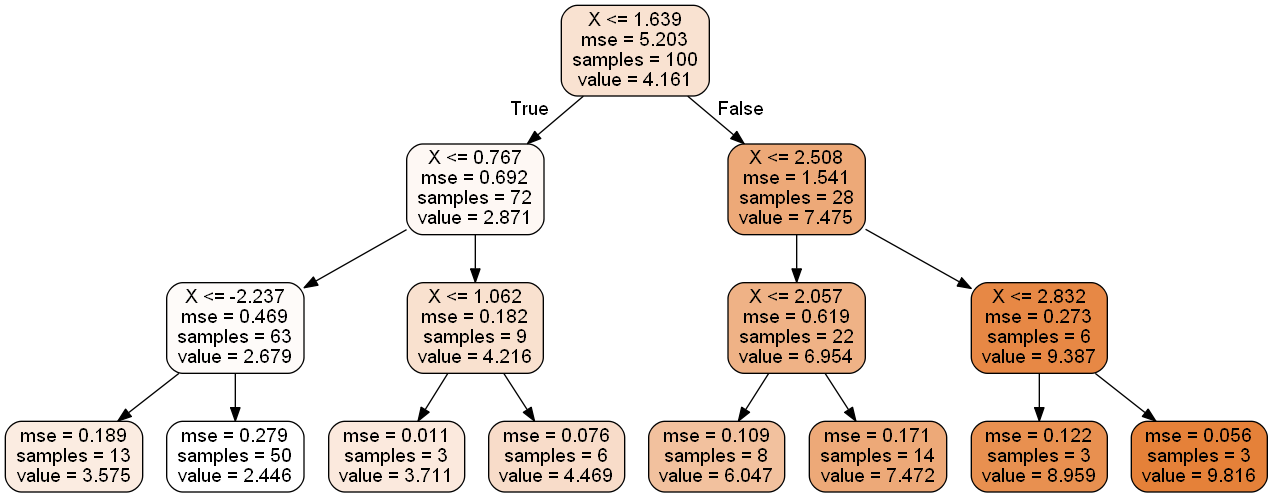

In [18]:

col_names_reg = ['X']

dot_file_reg = StringIO()

export_graphviz(tree_reg, 
                out_file=dot_file_reg, 
                rounded=True, filled=True, 
                feature_names=col_names_reg)

graph = pydotplus.graph_from_dot_data(dot_file_reg.getvalue())

graph.write_png('reg_tree.png')

Image(graph.create_png())

#### Some Other Visualization

In [19]:
tree_reg_1 = DecisionTreeRegressor(max_depth=5)
tree_reg_2 = DecisionTreeRegressor(max_depth=3)

tree_reg_1.fit(X, y)
tree_reg_2.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [20]:
x1 = np.linspace(-4, 3, 500).reshape(-1,1)
y_pred_reg1 = tree_reg_1.predict(x1)
y_pred_reg2 = tree_reg_2.predict(x1)

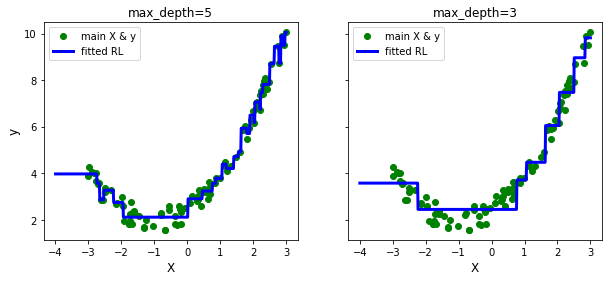

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, 'go', label='main X & y')
plt.plot(x1, y_pred_reg1, linewidth=3, c='b', label='fitted RL')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('max_depth=5')
plt.legend()

#####################################################

plt.sca(axes[1])
plt.plot(X,y, 'go', label='main X & y')
plt.plot(x1, y_pred_reg2, linewidth=3, c='b', label='fitted RL')
plt.xlabel('X', fontsize=12)
plt.title('max_depth=3')
plt.legend()
plt.show()